# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Read the Data

In [2]:
df = pd.read_csv('cost_revenue_dirty.csv')
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [3]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2054,2313,7/3/2003,Bringing Down the House,"$20,000,000","$164,675,402","$132,675,402"
2991,3215,9/28/2007,Trade,"$12,000,000","$1,513,388","$214,202"
1906,2863,11/10/2002,Tuck Everlasting,"$15,000,000","$19,344,615","$19,161,999"
684,1904,7/16/1993,Hocus Pocus,"$28,000,000","$39,360,491","$39,360,491"
2011,3534,4/16/2003,Chasing Papi,"$9,000,000","$12,657,377","$6,126,237"


# Explore and Clean the Data

    How many rows and columns does the dataset contain?

    Are there any NaN values present?

    Are there any duplicate rows?

    What are the data types of the columns?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
df.shape

(5391, 6)

In [6]:
df.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

- Check if there are missing values

<AxesSubplot:>

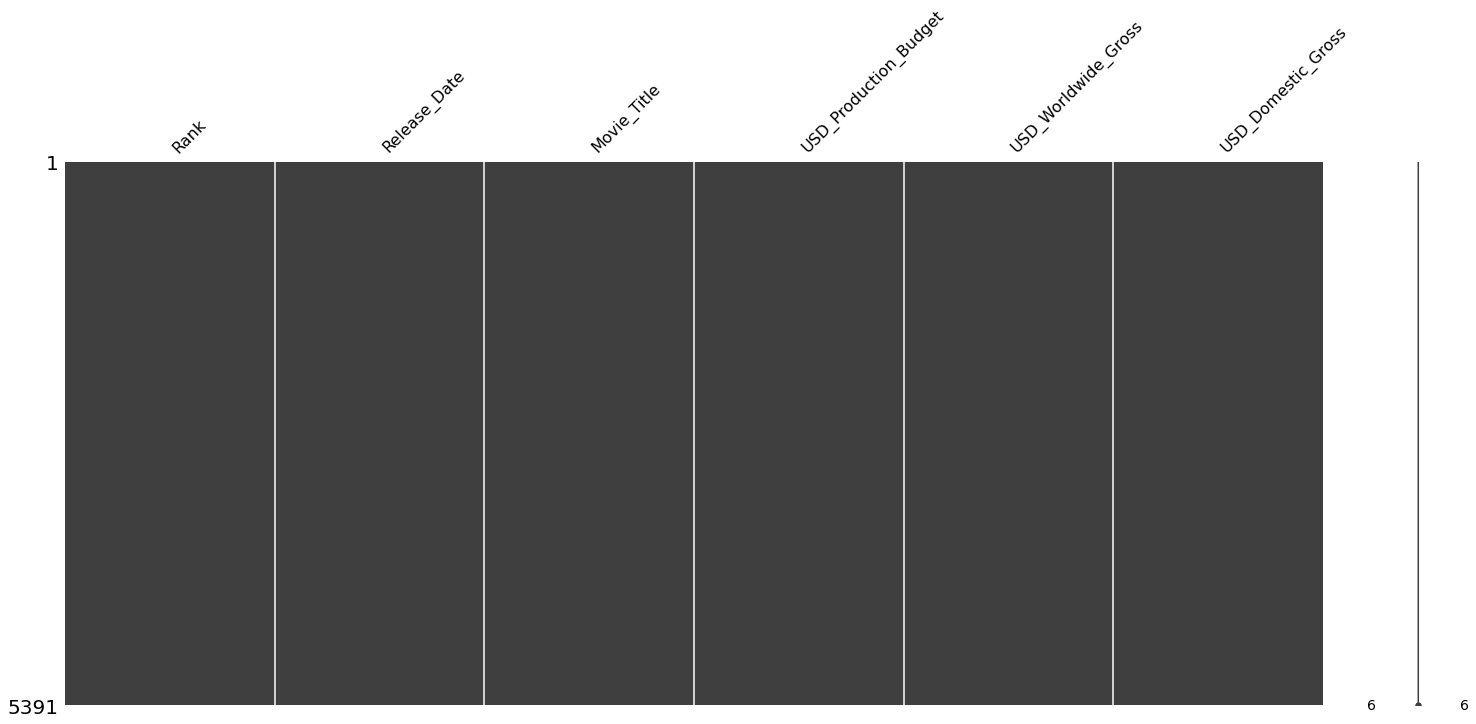

In [7]:
msno.matrix(df)

In [8]:
df.count()

Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64

In [9]:
df.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

- Are there duplicates? If Yes, how many?

In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


    Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing '$' signs and ','.

    Note that domestic in this context refers to the United States.

In [12]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
640,491,6/18/1992,Batman Returns,"$80,000,000","$266,824,291","$162,833,635"
2244,4815,6/18/2004,Grand Theft Parsons,"$1,200,000",$0,$0
2718,1804,7/21/2006,My Super Ex-Girlfriend,"$30,000,000","$60,772,856","$22,530,295"
5064,2500,11/13/2015,By the Sea,"$20,000,000","$3,727,746","$538,460"
2752,2647,9/22/2006,Renaissance,"$18,000,000","$2,401,413","$70,644"


- Remove '$', ',' and convert to numeric

In [13]:
# ch = ['$',',']

# for el in ch:
#     if el in first_el:
#         first_el.replace(el,'')
        
# first_el

In [14]:
# def cleaning(text):
#     ch = ['$',',']
#     for el in ch:
#         if el in text:
#              text=text.replace(el,'')
#     return text


In [ ]:
for x in ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']:
    #print(df[x])
    l=[]
    for y in df[x]:
        l.append(y.replace('$','').replace(',',''))
        #print(y)
    #print(l)
    l=np.array(l)
    #print(l.shape)
    df[x]=pd.Series(l)

df
    

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [16]:
df.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


- Converting to numeric

In [17]:
df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']]=df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [19]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [20]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


    What is the average production budget of the films in the data set?
    
    What is the average worldwide gross revenue of films?

    What were the minimums for worldwide and domestic revenue?

    Are the bottom 25% of films actually profitable or do they lose money?

    What are the highest production budget and highest worldwide gross revenue of any film?

    How much revenue did the lowest and highest budget films make?

In [22]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2845,2684,2007-01-26,Smokin' Aces,17000000,57263440,35662731
1414,1869,2000-04-14,Keeping the Faith,29000000,45336404,37036404
3320,1966,2009-01-16,Paul Blart: Mall Cop,26000000,185904750,146336178
3372,354,2009-05-06,Land of the Lost,100000000,69548641,49438370
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0


In [ ]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


- Changing output format

In [24]:
# float with two decimal
pd.set_option('display.float_format', '{:.2f}'.format)

In [25]:
df.USD_Production_Budget.mean()

31113737.57837136

In [ ]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.00,5391.00,5391.00,5391.00
mean,2696.00,31113737.58,88855421.96,41235519.44
std,1556.39,40523796.88,168457757.00,66029346.27
min,1.00,1100.00,0.00,0.00
25%,1348.50,5000000.00,3865206.00,1330901.50
50%,2696.00,17000000.00,27450453.00,17192205.00
75%,4043.50,40000000.00,96454455.00,52343687.00
max,5391.00,425000000.00,2783918982.00,936662225.00


    Which film was the lowest budget film in the dataset?

In [ ]:
df[df['USD_Production_Budget'] == df['USD_Production_Budget'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


    Which film was the highest budget film in the dataset?

In [ ]:
df[df['USD_Production_Budget'] == df['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


    How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [29]:
df.USD_Domestic_Gross.value_counts()

0            512
8000000        9
7000000        7
2000000        7
10000000       6
            ... 
130444603      1
49823037       1
130178411      1
7578946        1
18653615       1
Name: USD_Domestic_Gross, Length: 4809, dtype: int64

In [30]:
df[df['USD_Domestic_Gross']==0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [31]:
df[df['USD_Domestic_Gross']==0].sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


    How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?

In [32]:
df[df['USD_Worldwide_Gross']==0].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

In [ ]:
df[df['USD_Worldwide_Gross']==0].sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


In [34]:
df[(df['USD_Worldwide_Gross']==0) & (df['USD_Domestic_Gross']==0)].sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


    Which films made money internationally, but had zero box office revenue in the United States? 

In [35]:
df[(df['USD_Worldwide_Gross']!=0) & (df['USD_Domestic_Gross']==0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [36]:
df[(df['USD_Worldwide_Gross']!=0) & (df['USD_Domestic_Gross']==0)].sort_values('USD_Worldwide_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


- Alternatively using the query() function

In [ ]:
df.query('USD_Worldwide_Gross!=0 and USD_Domestic_Gross==0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


    Identify which films were not released yet as of the time of data collection (May 1st, 2018).

In [38]:
scrape_date = pd.Timestamp('2018-05-01')

In [39]:
df[df['Release_Date']>=scrape_date].count()

Rank                     7
Release_Date             7
Movie_Title              7
USD_Production_Budget    7
USD_Worldwide_Gross      7
USD_Domestic_Gross       7
dtype: int64

In [40]:
df[df['Release_Date']>=scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


    Create another DataFrame called data_clean that does not include these films. 

In [41]:
data_clean = df.drop(df[df['Release_Date']>=scrape_date].index)

In [42]:
data_clean.shape

(5384, 6)

In [43]:
assert df.shape > data_clean.shape

    Calculate the percentage of films that did not break even at the box office. We already saw that more than the bottom quartile of movies appears to lose money when we ran .describe(). However, what is the true percentage of films where the costs exceed the worldwide gross revenue? 

In [44]:
data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [45]:
round((data_clean.query('USD_Production_Budget > USD_Worldwide_Gross').shape[0]/data_clean.shape[0]) * 100, 2)

37.28

    Seaborn Scatter Plots

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

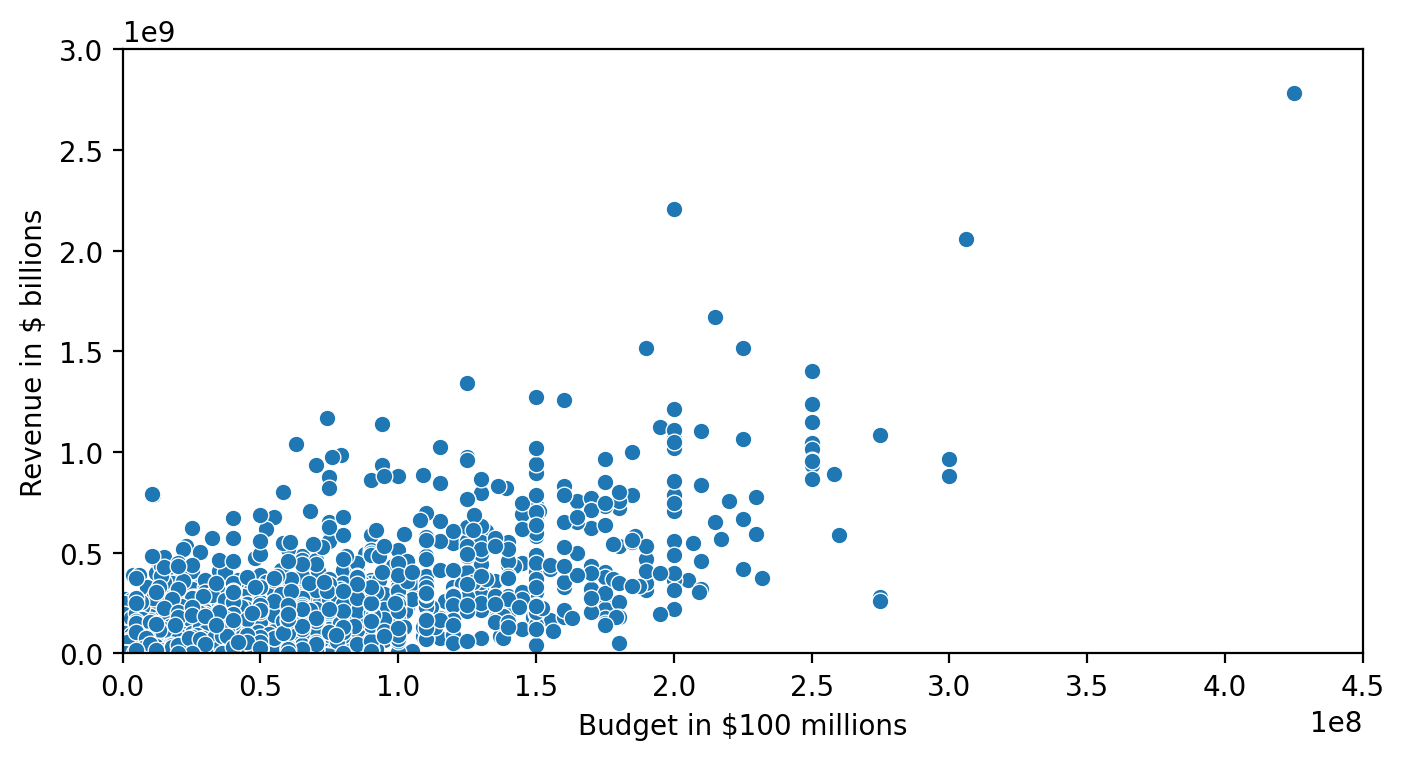

In [46]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean, 
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross'
                )

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

     With HUE and SIZE we can colour the data and change their size according to one of the columns in our DataFrame. 

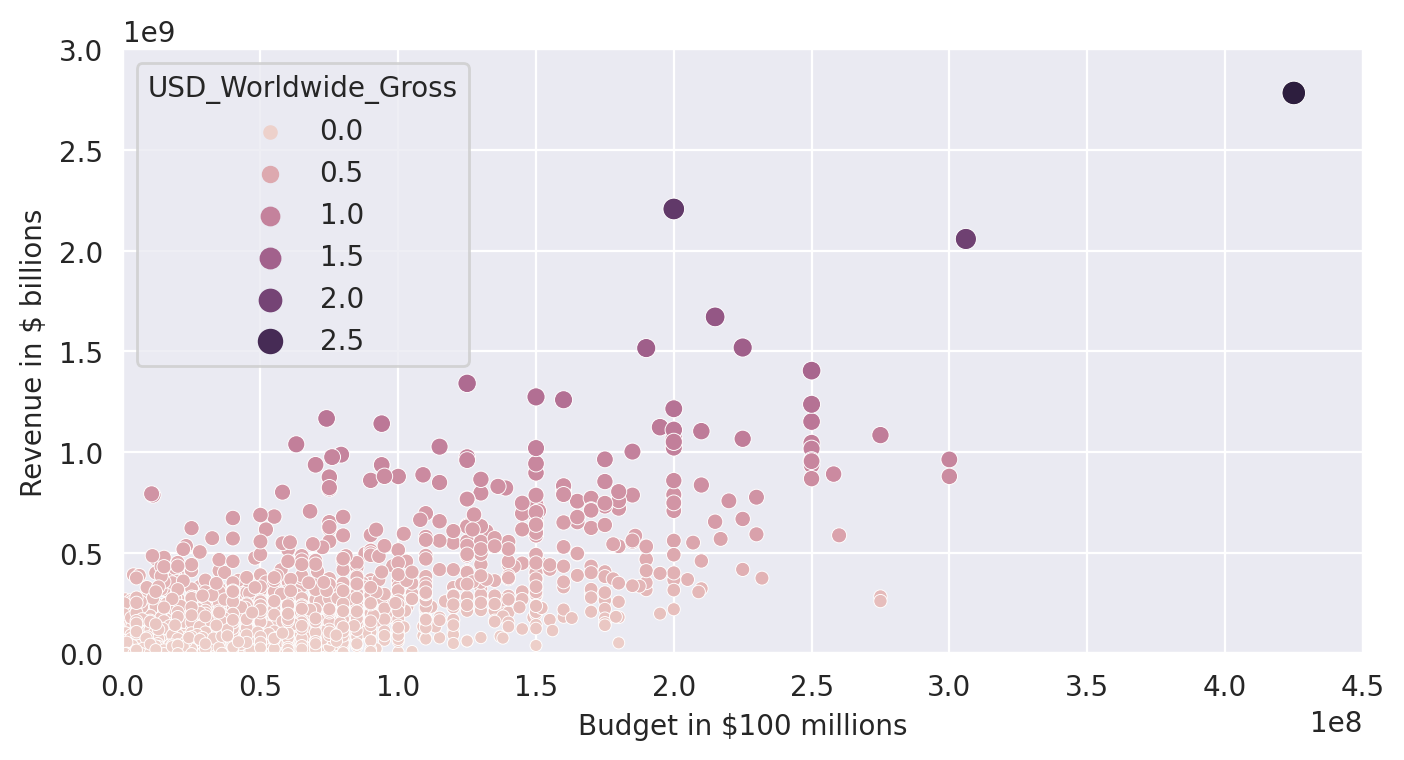

In [47]:
plt.figure(figsize=(8,4), dpi=200)

# set the styling on a single chart
with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=data_clean, 
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    hue='USD_Worldwide_Gross', # colour
                    size='USD_Worldwide_Gross' # dot size
                    )

    ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

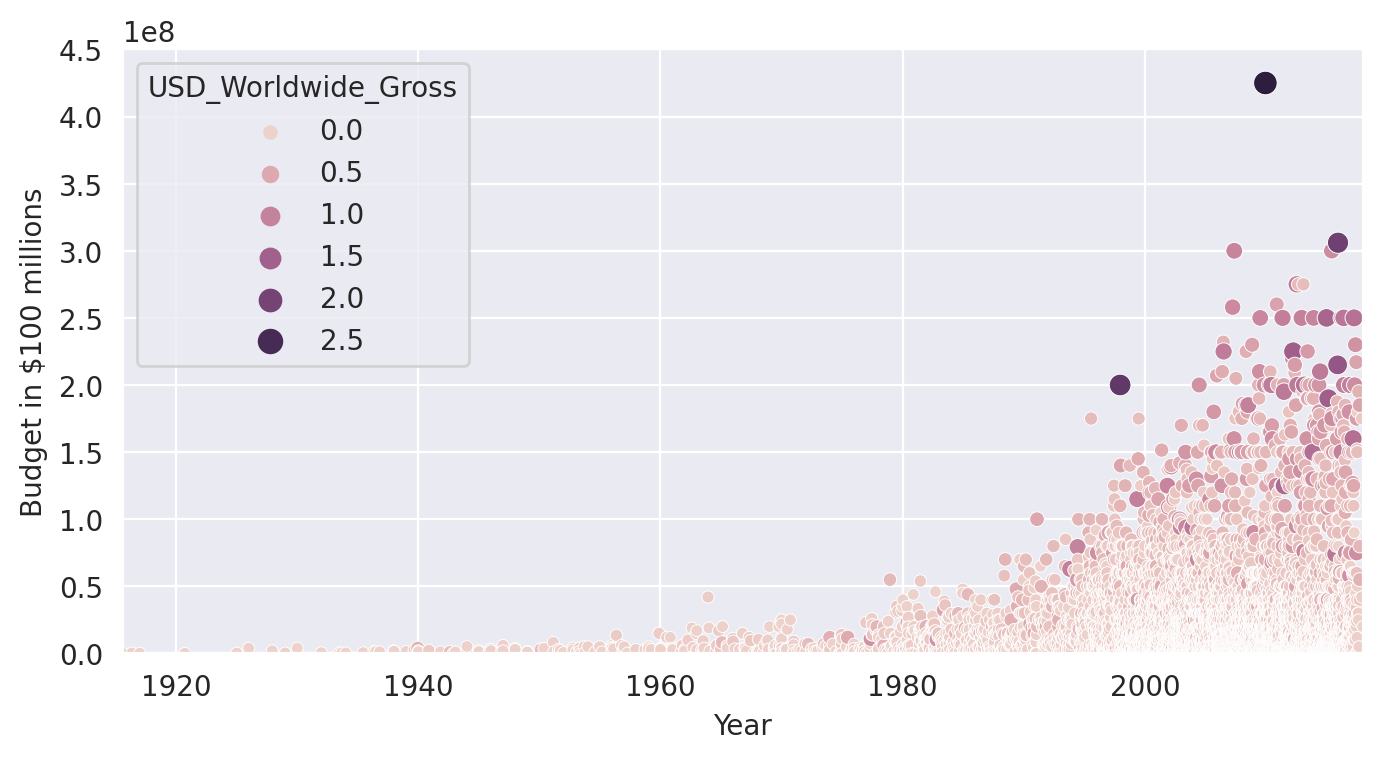

In [48]:
plt.figure(figsize=(8,4), dpi=200)

# set the styling on a single chart
with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross', # colour
                    size='USD_Worldwide_Gross' # dot size
                    )

    ax.set(ylim=(0, 450000000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        ylabel='Budget in $100 millions',
        xlabel='Year')

    Separate movies by decade

In [49]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
dt_index

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)

In [50]:
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

- Using floor division // to round down

In [51]:
decades = (years//10)*10
decades

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

In [52]:

data_clean['Decades'] = decades

In [ ]:
data_clean.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
3617,1819,2010-04-06,Splice,30000000,26857459,17010170,2010
4446,2610,2013-08-16,Jobs,18000000,43402515,16131410,2010
4545,3731,2014-01-17,Devil's Due,7000000,36146087,15821461,2010
1178,2887,1998-11-25,Home Fries,15000000,10513979,10513979,1990
1085,780,1998-05-06,The Truman Show,60000000,264118201,125618201,1990


    old_films data frame should include all the films before 1970 (up to and including 1969)

In [54]:
old_films = data_clean[data_clean.Decades <= 1960]

In [55]:
assert old_films.Decades.max() == 1960

    new_films data frame should include all films from 1970 onwards

In [56]:
new_films = data_clean[data_clean.Decades > 1960]

In [57]:
assert new_films.Decades.min() == 1970

        How many films were released prior to 1970?

In [58]:
old_films.shape

(153, 7)

In [59]:
old_films.Decades.count()

153

In [60]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
count,153.00,153.00,153.00,153.00,153.00
mean,4274.77,4611297.65,30419634.38,22389473.87,1949.15
std,742.14,5713648.85,54931828.93,32641752.41,12.72
min,1253.00,100000.00,0.00,0.00,1910.00
25%,3973.00,1250000.00,5273000.00,5000000.00,1940.00
50%,4434.00,2900000.00,10000000.00,10000000.00,1950.00
75%,4785.00,5000000.00,33208099.00,28350000.00,1960.00
max,5299.00,42000000.00,390525192.00,198680470.00,1960.00


- most expensive films

In [61]:
old_films.sort_values('USD_Production_Budget', ascending=False)[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


- movie with the highest worldwide revenue

In [62]:
old_films[(old_films.USD_Worldwide_Gross - old_films.USD_Production_Budget) == (old_films.USD_Worldwide_Gross - old_films.USD_Production_Budget).max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
23,4248,1939-12-15,Gone with the Wind,3900000,390525192,198680470,1930


- movie with the highest domestic revenue

In [63]:
old_films[(old_films.USD_Domestic_Gross - old_films.USD_Production_Budget) == (old_films.USD_Domestic_Gross - old_films.USD_Production_Budget).max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
23,4248,1939-12-15,Gone with the Wind,3900000,390525192,198680470,1930


    How many films were released from 1970 onward?

In [64]:
new_films.shape

(5231, 7)

In [65]:
new_films.Decades.count()

5231

In [66]:
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
count,5231.00,5231.00,5231.00,5231.00,5231.00
mean,2652.00,31811437.73,90683497.56,41841922.35,2000.19
std,1549.33,40758580.67,170424978.36,66702734.68,9.58
min,1.00,1100.00,0.00,0.00,1970.00
25%,1314.50,5000000.00,3831677.00,1252581.00,2000.00
50%,2629.00,18000000.00,28544120.00,17510118.00,2000.00
75%,3967.50,40000000.00,98777000.00,53301583.00,2010.00
max,5391.00,425000000.00,2783918982.00,936662225.00,2010.00


- most expensive films

In [67]:
new_films.sort_values('USD_Production_Budget', ascending=False)[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,2010
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,2010


In [68]:
(new_films.USD_Worldwide_Gross - new_films.USD_Production_Budget).max()

2358918982

- movie with the highest worldwide revenue

In [69]:
new_films[(new_films.USD_Worldwide_Gross - new_films.USD_Production_Budget) == (new_films.USD_Worldwide_Gross - new_films.USD_Production_Budget).max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000


- movie with the highest domestic revenue

In [70]:
new_films[(new_films.USD_Domestic_Gross - new_films.USD_Production_Budget) == (new_films.USD_Domestic_Gross - new_films.USD_Production_Budget).max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010


    Visualise the relationship between the movie budget and the worldwide revenue using linear regression

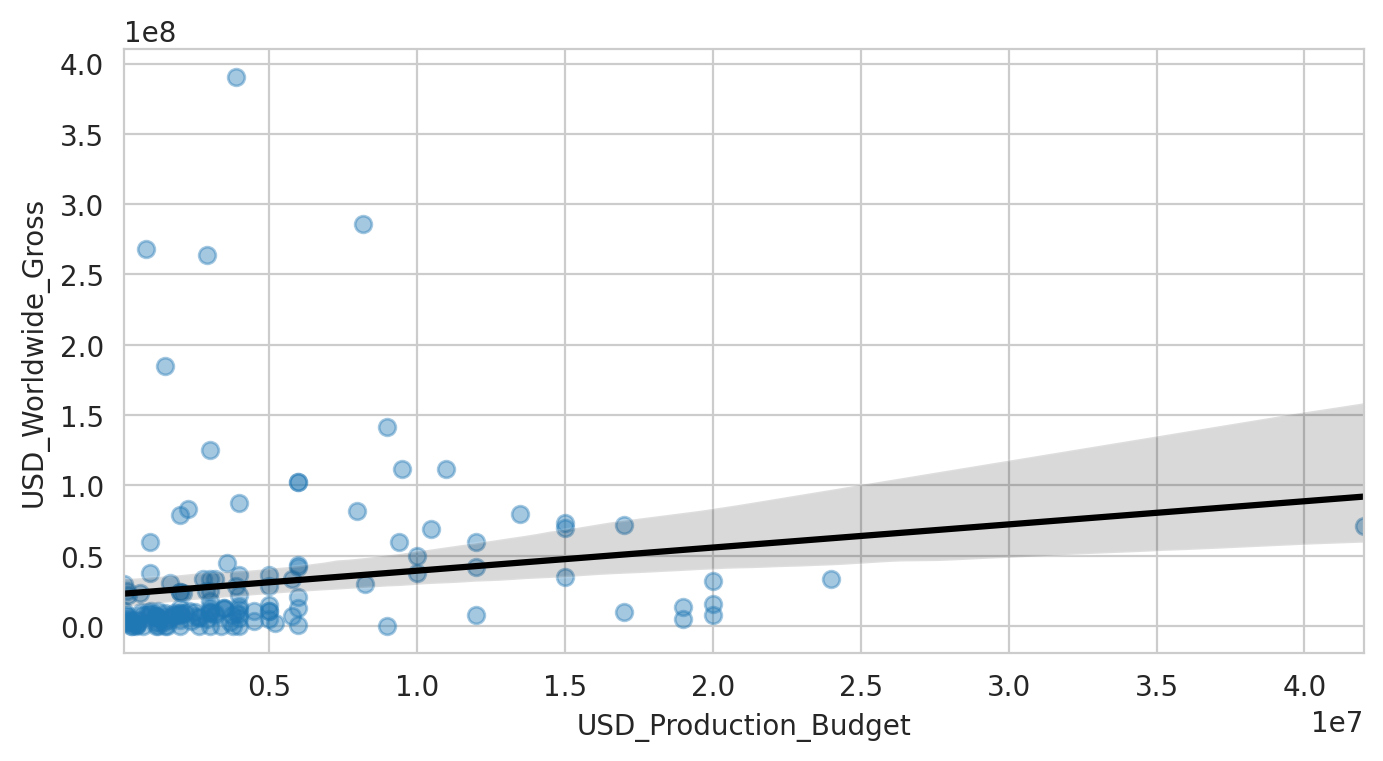

In [71]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha':0.4},
            line_kws = {'color':'black'})
    



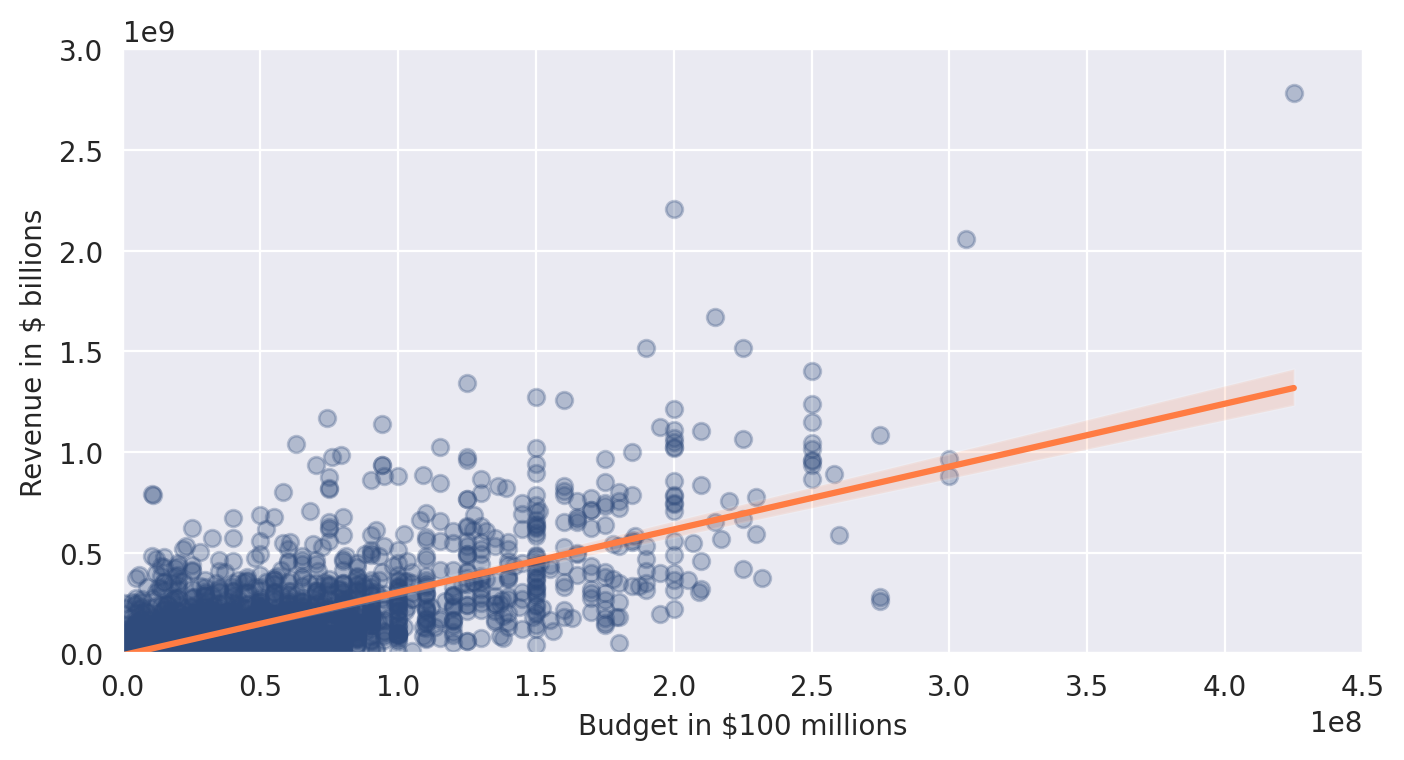

In [72]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     color='#2f4b7c',
                     scatter_kws = {'alpha':0.3},
                     line_kws = {'color':'#ff7c43'})
    
    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')

    Linear Regression Model

In [73]:
regression = LinearRegression()

#### Explanatory Feature(s)

In [74]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

#### Target

In [75]:
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

#### Find the best-fit line

In [76]:
regression.fit(X, y)

LinearRegression()

In [77]:
# Theta zero
regression.intercept_

array([-8650768.00661026])

In [78]:
# Theta one
regression.coef_

array([[3.12259592]])

In [79]:
# R-squared
regression.score(X, y)

0.5577032617720403

    Making a prediction: for $350 million budget film, what will be the worldwide revenue?

In [80]:
budget = 350000000

In [81]:
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0] * budget

In [82]:
revenue_estimate = round(revenue_estimate, -6)

In [83]:
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.084e+09.
